<a href="https://colab.research.google.com/github/danhnguyen123/UserSegmentation/blob/main/User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apache Spark**

Connect google drive

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install evironment

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))

if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

In [ ]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 70kB/s 
     |████████████████████████████████| 204kB 45.6MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257928 sha256=5105667f5f6a8ff86745ae8f207f61357bda51c612f2f1facff0b00d374b528c
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_275"
OpenJDK Runtime Environment (build 1.8.0_275-8u275-b01-0ubuntu1~18.04-b01)
OpenJDK 64-Bit Server VM (build 25.275-b01, mixed mode)


In [ ]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [ ]:
from pyspark import SparkContext, HiveContext
sqlContext = HiveContext(sc)

In [ ]:
from pyspark.sql import SparkSession
appName = "PySpark Hive Example"
master = "local"
# Create Spark session with Hive supported.
spark = SparkSession.builder \
.appName(appName) \
.master(master) \
.enableHiveSupport() \
.getOrCreate()

Event

In [ ]:
# create a dataframe out of it by using the first row as field names and trying to infer a schema based on contents
event = spark.read.option("header", "true").option("inferSchema","true").csv('/content/drive/MyDrive/Colab Notebooks/Gapo/event.csv')
event.write.mode("overwrite").saveAsTable("event_user")

In [ ]:
spark.sql("select * from event_user").show()

+-------------------+----------+--------------------+--------------+--------------+--------------+------------+--------------------+------------+-------------+-----------+-------+----------------+
|     event_datetime|   user_id|      user_pseudo_id|staging_screen|defined_screen|       feature|  event_name|engagement_time_msec|subject_type|verb_duration|app_version|country|            city|
+-------------------+----------+--------------------+--------------+--------------+--------------+------------+--------------------+------------+-------------+-----------+-------+----------------+
|2020-12-08 02:52:12|1097048684|e20ece1682ba3ecc3...|     discovery|     discovery|Discovery Feed|view_content|                null|      viewer|       131089|     2.11.3|Vietnam|Ho Chi Minh City|
|2020-12-07 15:28:21| 281797800|838a845e5622136a7...|     discovery|     discovery|Discovery Feed|view_content|                null|      viewer|        12819|     2.11.3|Vietnam|Ho Chi Minh City|
|2020-12-09 23:

Aggregate Recency, Frequency, Number of install, Total usage

In [ ]:
results_1 = spark.sql("select user_id, max(event_datetime) as last_event, count(*) as frequency, count(distinct user_pseudo_id) as num_ins, sum(engagement_time_msec) as time_use from event_user group by user_id")
results_1.write.mode("overwrite").saveAsTable("summarize_user")

In [ ]:
spark.sql("select * from summarize_user").show()

+----------+-------------------+---------+-------+--------+
|   user_id|         last_event|frequency|num_ins|time_use|
+----------+-------------------+---------+-------+--------+
| 179873540|2020-12-12 09:04:05|      833|      1| 2902699|
|1313412995|2020-12-13 16:59:41|      993|      1| 1597208|
| 408975840|2020-12-11 14:47:03|      334|      1|  612110|
| 318189351|2020-12-10 15:41:46|      301|      1| 1036510|
| 618792499|2020-12-13 19:38:46|       36|      1|    null|
|1332991751|2020-12-13 18:31:59|       14|      1|    null|
| 825321902|2020-12-13 16:07:19|       12|      1|    null|
|1109961619|2020-12-13 21:43:44|       16|      1|    null|
| 317183786|2020-12-13 21:46:54|     5421|      2|13666833|
|1414309719|2020-12-13 17:05:07|       11|      1|    null|
|1689757964|2020-12-07 20:00:49|        2|      1|    null|
|  24911027|2020-12-10 17:31:25|      381|      1|  985842|
|1548762483|2020-12-08 03:48:27|       92|      1|  156849|
|1053171240|2020-12-08 22:49:30|     410

In [ ]:
# spark.sql("select count(*) from last_time_user").show()
# 253751

User

In [ ]:
user = spark.read.option("header", "true").option("inferSchema","true").csv('/content/drive/MyDrive/Colab Notebooks/Gapo/adhoc_user_profile.csv')
user.write.mode("overwrite").saveAsTable("profile_user")

In [ ]:
spark.sql("select * from profile_user").show()

+----------+---+------+-------------+---------+---------------------+---------------+------------+--------------------+--------------------+---------------------+-------------+----------+---------+--------+-----------+---------+----------------+---------+----------------+-------------------+----------------+----------+----------------+--------+---------+-----------------+--------------------+--------------------+--------------------+-------------+--------------+---------------+-------------------+------+------+------+------+------+------+------+--------+--------+--------+--------+--------+--------+--------+
|   user_id|age|gender|avatar_status|age_group|identification_status|register_source|relationship|         create_date|        create_month|day_from_created_date|status_verify|user_group|user_flag|post_cnt|comment_cnt|react_cnt|conversation_cnt|story_cnt|send_request_cnt|receive_request_cnt|user_request_cnt|friend_cnt|page_request_cnt|page_cnt|group_cnt|group_request_cnt|      last_

Lấy feature khác

In [ ]:
results_2 = spark.sql("select a.user_id as user_id_7, a.last_event,a.frequency,a.num_ins,a.time_use, b.* from summarize_user as a left join profile_user as b on a.user_id = b.user_id")
results_2.write.mode("overwrite").saveAsTable("event_user")

In [ ]:
spark.sql("select count(*) from event_user").show()

+--------+
|count(1)|
+--------+
|  253751|
+--------+



In [ ]:
results_2.coalesce(1).write.format('csv').save("/content/drive/MyDrive/Colab Notebooks/Gapo/data_segmentation", header='true')

# **User segmentation**

### Import modules requiered

In [ ]:
#import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#nguyenthedanh1701035087@ftu.edu.vn

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')
#nguyenthedanh34@gmail.com

Authenticated


### Read data from Google Bigquery into a DataFrame

In [ ]:
# Display query output immediately
%%bigquery --project danh-298607 df_1
SELECT *
FROM `danh-298607.SampleGapo.data_segmentation`

In [ ]:
df_2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Gapo/data_relationship.xlsx")
df = pd.merge(df_1, df_2, on = 'user_id', how = 'left')
df

,user_id,frequency,recency,num_install,day_from_created_date,age,male,female,lgbt,post_cnt,comment_cnt,react_cnt,conversation_cnt,story_cnt,send_request_cnt,receive_request_cnt,user_request_cnt,friend_cnt,page_request_cnt,page_cnt,group_cnt,group_request_cnt,usage_day_cnt,usage_week_cnt,usage_month_cnt,usage_hour_cnt,cnt_7d,cnt_6d,cnt_5d,cnt_4d,cnt_3d,cnt_2d,cnt_1d,cnt_7d_w,cnt_6d_w,cnt_5d_w,cnt_4d_w,cnt_3d_w,cnt_2d_w,cnt_1d_w,alone,dating,family
0,334593674,4,0,1,327,NaN,0,0,0,NaN,NaN,NaN,1.0,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,264,50,12,1.389559,129,11,14,17,20,30,43,18,10,8,4,5,2,3,0.0,0.0,0.0
1,779537014,7,0,1,267,NaN,0,0,0,NaN,NaN,4.0,NaN,1.0,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,177,35,10,0.380738,68,10,12,15,17,22,33,9,10,4,5,2,3,2,0.0,0.0,0.0
2,1034237796,13,0,1,306,NaN,0,0,0,9.0,NaN,5.0,2.0,NaN,23.0,100.0,55.0,44.0,3.0,NaN,NaN,NaN,275,44,11,17.249801,177,11,13,15,18,20,21,25,11,4,3,0,1,0,0.0,0.0,0.0
3,1580518584,7,0,1,317,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,257,44,11,0.028043,156,12,13,16,17,18,25,23,9,5,2,1,2,2,0.0,0.0,0.0
4,1822170876,14,0,1,250,27.0,1,0,0,NaN,1.0,5.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,168,35,9,1.427022,60,8,11,15,17,23,34,9,6,6,5,2,6,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176214,125586062,19,0,1,249,17.0,0,1,0,NaN,NaN,8.0,NaN,NaN,1.0,18.0,16.0,15.0,4.0,NaN,NaN,NaN,201,36,9,0.281783,99,11,13,14,17,21,26,13,11,3,4,3,2,0,0.0,0.0,0.0
176215,1263393327,171,0,1,278,NaN,1,0,0,2.0,1.0,19.0,4.0,NaN,11.0,47.0,13.0,5.0,NaN,NaN,NaN,NaN,226,39,10,19.325236,128,10,12,14,16,21,25,18,10,3,4,1,3,0,0.0,0.0,0.0
176216,1287906010,10,0,1,277,NaN,0,0,0,4.0,1.0,4.0,1.0,NaN,106.0,98.0,106.0,29.0,NaN,NaN,NaN,NaN,224,40,10,0.885216,121,10,13,14,16,22,28,18,9,1,6,4,1,1,0.0,0.0,0.0
176217,1869658469,15,0,1,247,21.0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,166,34,9,0.234249,70,9,11,14,15,19,28,10,7,4,4,3,3,3,0.0,0.0,0.0


### Exploring the data

In [ ]:
#check null
print(f"Missing values in each variable: \n{df.isnull().sum()}")

Missing values in each variable: 
user_id                       0
frequency                     0
recency                       0
num_install                   0
day_from_created_date         0
age                        8480
male                          0
female                        0
lgbt                          0
post_cnt                  62854
comment_cnt              104970
react_cnt                 55016
conversation_cnt          55923
story_cnt                160726
send_request_cnt          52383
receive_request_cnt         459
user_request_cnt          56127
friend_cnt                52452
page_request_cnt         131102
page_cnt                 175016
group_cnt                175122
group_request_cnt        131059
usage_day_cnt                 0
usage_week_cnt                0
usage_month_cnt               0
usage_hour_cnt               50
cnt_7d                        0
cnt_6d                        0
cnt_5d                        0
cnt_4d                        0
cnt_3d

In [ ]:
#check duplicate
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


In [ ]:
# check type of variable
print(f"Variable:                  Type: \n{df.dtypes}") 

Variable:                  Type: 
user_id                    int64
frequency                  int64
recency                    int64
num_install                int64
day_from_created_date      int64
age                      float64
male                       int64
female                     int64
lgbt                       int64
post_cnt                 float64
comment_cnt              float64
react_cnt                float64
conversation_cnt         float64
story_cnt                float64
send_request_cnt         float64
receive_request_cnt      float64
user_request_cnt         float64
friend_cnt               float64
page_request_cnt         float64
page_cnt                 float64
group_cnt                float64
group_request_cnt        float64
usage_day_cnt              int64
usage_week_cnt             int64
usage_month_cnt            int64
usage_hour_cnt           float64
cnt_7d                     int64
cnt_6d                     int64
cnt_5d                     int64
cnt_4d   

#### Descriptive statistics and Distribution

In [ ]:
df.describe()

,user_id,frequency,recency,num_install,day_from_created_date,age,male,female,lgbt,post_cnt,comment_cnt,react_cnt,conversation_cnt,story_cnt,send_request_cnt,receive_request_cnt,user_request_cnt,friend_cnt,page_request_cnt,page_cnt,group_cnt,group_request_cnt,usage_day_cnt,usage_week_cnt,usage_month_cnt,usage_hour_cnt,cnt_7d,cnt_6d,cnt_5d,cnt_4d,cnt_3d,cnt_2d,cnt_1d,cnt_7d_w,cnt_6d_w,cnt_5d_w,cnt_4d_w,cnt_3d_w,cnt_2d_w,cnt_1d_w,alone,dating,family
count,1.762190e+05,176219.000000,176219.000000,176219.000000,176219.000000,167739.000000,176219.000000,176219.000000,176219.000000,113365.000000,71249.000000,121203.000000,120296.000000,15493.000000,123836.000000,175760.000000,120092.000000,123767.000000,45117.000000,1203.000000,1097.000000,45160.000000,176219.000000,176219.000000,176219.000000,176169.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176219.000000,176218.000000,176218.000000,176218.000000
mean,9.992152e+08,433.202186,0.994234,1.038588,100.326911,25.974597,0.701201,0.218348,0.016173,6.428492,15.766762,30.723695,11.676357,2.995482,53.671097,38.796262,69.919345,31.530634,6.899107,1.353283,1.343665,3.357307,56.867619,12.005766,3.848915,7.125965,28.575142,2.297772,2.882056,3.474881,4.257543,5.932045,9.448181,4.065141,1.851168,1.097657,1.147339,0.898785,1.584954,1.360722,0.330608,0.036455,0.074760
std,5.763798e+08,1259.806462,1.792180,1.316766,88.845716,8.897039,0.457733,0.413126,0.126141,44.203946,195.982259,275.277343,64.168728,16.508168,393.623995,158.636818,873.292832,178.347504,18.104894,0.663309,1.780223,9.498183,67.215507,11.311602,2.769742,17.904873,50.399795,2.477650,2.934494,3.476718,4.081940,5.658047,9.046836,7.254533,2.168104,1.486047,1.550463,1.342491,1.542269,1.999260,0.470433,0.187420,0.263004
min,5.272630e+05,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.004206e+08,14.000000,0.000000,1.000000,27.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,11.000000,4.000000,2.000000,0.631510,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.981762e+08,97.000000,0.000000,1.000000,65.000000,25.000000,1.000000,0.000000,0.000000,2.000000,3.000000,6.000000,5.000000,1.000000,12.000000,10.000000,16.000000,10.000000,3.000000,1.000000,1.000000,1.000000,30.000000,8.000000,3.000000,1.823871,8.000000,1.000000,2.000000,2.000000,3.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.498452e+09,378.000000,1.000000,1.000000,161.000000,30.000000,1.000000,0.000000,0.000000,4.000000,8.000000,17.000000,10.000000,2.000000,42.000000,41.000000,52.000000,27.000000,7.000000,2.000000,1.000000,3.000000,75.000000,17.000000,6.000000,5.886970,26.000000,4.000000,5.000000,6.000000,7.000000,9.000000,14.000000,4.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000
max,2.000497e+09,119115.000000,6.000000,537.000000,356.000000,100.000000,1.000000,1.000000,1.000000,6244.000000,26719.000000,37691.000000,13667.000000,1463.000000,51805.000000,26200.000000,109187.000000,15570.000000,1243.000000,5.000000,39.000000,1563.000000,350.000000,51.000000,12.000000,747.775854,344.000000,19.000000,25.000000,28.000000,35.000000,48.000000,82.000000,49.000000,19.000000,20.000000,15.000000,17.000000,18.000000,23.000000,1.000000,1.000000,1.000000


#### Clean data

In [ ]:
#fill null
df = df.fillna(0)
print(f"Missing values in each variable: \n{df.isnull().sum()}")

Missing values in each variable: 
user_id                  0
frequency                0
recency                  0
num_install              0
day_from_created_date    0
age                      0
male                     0
female                   0
lgbt                     0
post_cnt                 0
comment_cnt              0
react_cnt                0
conversation_cnt         0
story_cnt                0
send_request_cnt         0
receive_request_cnt      0
user_request_cnt         0
friend_cnt               0
page_request_cnt         0
page_cnt                 0
group_cnt                0
group_request_cnt        0
usage_day_cnt            0
usage_week_cnt           0
usage_month_cnt          0
usage_hour_cnt           0
cnt_7d                   0
cnt_6d                   0
cnt_5d                   0
cnt_4d                   0
cnt_3d                   0
cnt_2d                   0
cnt_1d                   0
cnt_7d_w                 0
cnt_6d_w                 0
cnt_5d_w             

In [ ]:
df

,user_id,frequency,recency,num_install,day_from_created_date,age,male,female,lgbt,post_cnt,comment_cnt,react_cnt,conversation_cnt,story_cnt,send_request_cnt,receive_request_cnt,user_request_cnt,friend_cnt,page_request_cnt,page_cnt,group_cnt,group_request_cnt,usage_day_cnt,usage_week_cnt,usage_month_cnt,usage_hour_cnt,cnt_7d,cnt_6d,cnt_5d,cnt_4d,cnt_3d,cnt_2d,cnt_1d,cnt_7d_w,cnt_6d_w,cnt_5d_w,cnt_4d_w,cnt_3d_w,cnt_2d_w,cnt_1d_w,alone,dating,family
0,1536939802,7140,0,1,312,0.0,1,0,0,11.0,60.0,123.0,103.0,0.0,296.0,250.0,412.0,313.0,4.0,0.0,0.0,6.0,277,45,11,97.696438,176,12,14,16,16,20,23,24,13,3,2,2,1,0,0.0,0.0,0.0
1,1419430539,3369,0,1,308,0.0,0,0,0,7.0,10.0,58.0,7.0,0.0,21.0,144.0,25.0,44.0,0.0,0.0,0.0,4.0,240,44,11,89.605201,125,9,12,15,18,23,38,18,10,3,5,4,3,1,0.0,0.0,0.0
2,1866825560,19,0,1,249,20.0,1,0,0,1.0,1.0,13.0,0.0,0.0,4.0,57.0,28.0,24.0,1.0,0.0,0.0,0.0,207,36,9,0.780973,97,8,13,15,21,25,28,14,9,9,0,2,2,0,0.0,0.0,0.0
3,496181559,8,0,1,296,0.0,0,0,0,3.0,0.0,6.0,0.0,0.0,0.0,72.0,6.0,6.0,0.0,0.0,0.0,0.0,222,42,11,1.722316,107,11,14,15,18,26,31,15,10,4,5,2,5,1,0.0,0.0,0.0
4,1481276390,672,0,1,290,0.0,1,0,0,10.0,8.0,259.0,15.0,0.0,48.0,157.0,156.0,171.0,11.0,0.0,0.0,3.0,257,42,10,43.167825,147,14,15,17,17,22,25,20,12,7,2,0,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176214,1431065131,19,0,1,250,28.0,1,0,0,0.0,1.0,5.0,10.0,0.0,0.0,21.0,0.0,8.0,0.0,0.0,0.0,0.0,189,37,10,0.959181,85,9,11,14,16,22,32,12,7,4,7,3,2,2,0.0,0.0,0.0
176215,255203589,7,0,1,312,0.0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,208,41,11,0.159142,107,9,11,14,15,21,31,15,7,4,5,3,5,2,0.0,0.0,0.0
176216,734928698,899,1,1,193,28.0,1,0,0,0.0,0.0,7.0,19.0,0.0,11.0,65.0,44.0,73.0,10.0,0.0,0.0,2.0,165,28,7,19.033777,73,12,12,14,15,19,20,11,10,3,2,1,1,0,0.0,0.0,0.0
176217,1054779009,7,0,1,273,0.0,1,0,0,0.0,0.0,9.0,5.0,0.0,28.0,59.0,27.0,6.0,1.0,0.0,0.0,0.0,214,38,10,5.465667,112,9,12,14,15,21,31,16,8,5,5,1,3,0,0.0,0.0,0.0


In [ ]:
column = ['frequency', 'recency', 'num_install', 'day_from_created_date', 'age', 'male', 'female', 'lgbt', 'alone','dating', 'family', 
          'post_cnt', 'comment_cnt', 'react_cnt', 'conversation_cnt', 'story_cnt', 
          'send_request_cnt', 'receive_request_cnt', 'user_request_cnt',
          'friend_cnt', 'page_request_cnt', 'page_cnt', 'group_cnt',
          'group_request_cnt', 'usage_day_cnt', 
          'usage_week_cnt', 'usage_month_cnt', 'usage_hour_cnt', 
          'cnt_7d', 'cnt_6d', 'cnt_5d', 'cnt_4d', 'cnt_3d', 'cnt_2d', 'cnt_1d', 'cnt_7d_w', 'cnt_6d_w', 'cnt_5d_w', 'cnt_4d_w', 'cnt_3d_w', 'cnt_2d_w', 'cnt_1d_w']
df = df[column]

In [ ]:
pca = PCA(n_components=2).fit(df)

In [ ]:
print(pca.explained_variance_ratio_)

[0.69360991 0.24186303]


In [ ]:
# Transform samples using the PCA fit:
pca_2d = pca.transform(df)

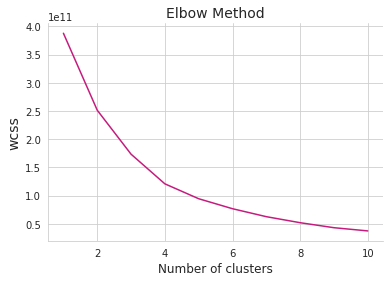

In [ ]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', 
                max_iter=300, n_init=10, 
                random_state=0)
    km.fit(pca_2d)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [ ]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)
# Fit and predict 
y_means = kmeans.fit_predict(df)

In [ ]:
result = pd.concat([df, pd.DataFrame(y_means, columns= ['ClusterID'])], axis = 1)
result

,frequency,recency,num_install,day_from_created_date,age,male,female,lgbt,alone,dating,family,post_cnt,comment_cnt,react_cnt,conversation_cnt,story_cnt,send_request_cnt,receive_request_cnt,user_request_cnt,friend_cnt,page_request_cnt,page_cnt,group_cnt,group_request_cnt,usage_day_cnt,usage_week_cnt,usage_month_cnt,usage_hour_cnt,cnt_7d,cnt_6d,cnt_5d,cnt_4d,cnt_3d,cnt_2d,cnt_1d,cnt_7d_w,cnt_6d_w,cnt_5d_w,cnt_4d_w,cnt_3d_w,cnt_2d_w,cnt_1d_w,ClusterID
0,4,0,1,327,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,264,50,12,1.389559,129,11,14,17,20,30,43,18,10,8,4,5,2,3,0
1,7,0,1,267,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,177,35,10,0.380738,68,10,12,15,17,22,33,9,10,4,5,2,3,2,0
2,13,0,1,306,0.0,0,0,0,0.0,0.0,0.0,9.0,0.0,5.0,2.0,0.0,23.0,100.0,55.0,44.0,3.0,0.0,0.0,0.0,275,44,11,17.249801,177,11,13,15,18,20,21,25,11,4,3,0,1,0,0
3,7,0,1,317,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,257,44,11,0.028043,156,12,13,16,17,18,25,23,9,5,2,1,2,2,0
4,14,0,1,250,27.0,1,0,0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,168,35,9,1.427022,60,8,11,15,17,23,34,9,6,6,5,2,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176214,19,0,1,249,17.0,0,1,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,18.0,16.0,15.0,4.0,0.0,0.0,0.0,201,36,9,0.281783,99,11,13,14,17,21,26,13,11,3,4,3,2,0,0
176215,171,0,1,278,0.0,1,0,0,0.0,0.0,0.0,2.0,1.0,19.0,4.0,0.0,11.0,47.0,13.0,5.0,0.0,0.0,0.0,0.0,226,39,10,19.325236,128,10,12,14,16,21,25,18,10,3,4,1,3,0,0
176216,10,0,1,277,0.0,0,0,0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,0.0,106.0,98.0,106.0,29.0,0.0,0.0,0.0,0.0,224,40,10,0.885216,121,10,13,14,16,22,28,18,9,1,6,4,1,1,0
176217,15,0,1,247,21.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,166,34,9,0.234249,70,9,11,14,15,19,28,10,7,4,4,3,3,3,0


In [ ]:
result.to_excel("/content/drive/MyDrive/Colab Notebooks/Gapo/k-means.xlsx")  

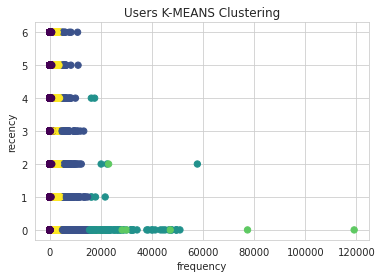

In [ ]:
plt.scatter(result["frequency"], 
            result["recency"], 
            c=result["ClusterID"], s=40, cmap='viridis')
plt.xlabel("frequency")
plt.ylabel("recency")
plt.title("Users K-MEANS Clustering");

Centre

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = column)

In [ ]:
centroids.index_name = "ClusterID"

In [ ]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [ ]:
centroids

,frequency,recency,num_install,day_from_created_date,age,male,female,lgbt,alone,dating,family,post_cnt,comment_cnt,react_cnt,conversation_cnt,story_cnt,send_request_cnt,receive_request_cnt,user_request_cnt,friend_cnt,page_request_cnt,page_cnt,group_cnt,group_request_cnt,usage_day_cnt,usage_week_cnt,usage_month_cnt,usage_hour_cnt,cnt_7d,cnt_6d,cnt_5d,cnt_4d,cnt_3d,cnt_2d,cnt_1d,cnt_7d_w,cnt_6d_w,cnt_5d_w,cnt_4d_w,cnt_3d_w,cnt_2d_w,cnt_1d_w,ClusterID
0,182.718631,1.035819,1.024302,102.835142,24.608188,0.698160,0.218521,1.641431e-02,0.315295,0.034064,0.072541,3.109477,4.931227,14.613135,5.796238,0.200282,26.711508,34.454516,30.329666,17.226553,1.609085,0.007668,0.007185,0.635706,58.200382,12.313471,3.940036,6.118417,28.972275,2.364030,2.976745,3.588909,4.387228,6.123013,9.788181,4.113834,1.928681,1.129622,1.192771,0.922907,1.617888,1.407768,0
1,23977.609023,0.135338,5.924812,78.187970,26.368421,0.533835,0.390977,3.007519e-02,0.526316,0.090226,0.075188,124.360902,59.368421,506.691729,121.473684,4.112782,706.548872,284.436090,884.330827,352.383459,5.481203,0.112782,0.037594,22.609023,53.180451,9.751880,3.142857,80.839295,39.406015,1.563910,1.721805,1.932331,2.233083,2.616541,3.706767,5.774436,0.616541,0.563910,0.436090,0.398496,1.338346,0.624060,1
2,7242.545552,0.313505,1.364416,74.965702,26.198285,0.741693,0.210611,6.430868e-03,0.543408,0.072347,0.096999,26.041801,31.023580,176.561093,54.364416,1.481779,237.338156,102.870847,323.418006,98.534298,5.073419,0.042337,0.028939,5.916935,48.878885,9.211147,2.941586,32.123779,32.586817,1.663987,1.899786,2.200429,2.628617,3.290997,4.608253,4.752947,0.939979,0.669882,0.531618,0.481243,1.213290,0.622186,2
3,20865.695652,0.565217,1.217391,156.565217,24.652174,0.521739,0.434783,3.469447e-18,0.565217,0.086957,0.043478,242.086957,1007.434783,1796.695652,1148.173913,28.826087,19320.391304,4313.913043,53041.000000,7595.739130,74.826087,0.782609,0.913043,21.086957,124.869565,21.260870,5.826087,146.609276,93.478261,3.347826,3.652174,4.260870,4.869565,6.391304,8.869565,13.565217,1.695652,1.478261,1.260870,1.217391,1.608696,0.434783,3
4,2041.370222,0.637940,1.107740,76.447490,25.786288,0.730853,0.215549,1.469188e-02,0.467555,0.057271,0.096041,11.026935,16.861856,64.950687,22.863556,0.713508,95.554959,67.643926,110.071215,50.977350,2.904979,0.019929,0.016868,2.427629,43.350020,9.028227,2.978846,13.974329,23.558155,1.664399,1.988777,2.412325,3.074752,4.224799,6.426813,3.419263,1.137328,0.809414,0.738879,0.694123,1.277037,0.952183,4


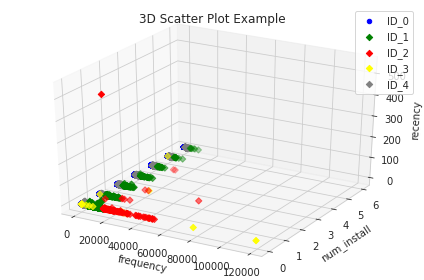

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#data.loc[(data.age >=12)][['city','gender']]

x0 = result.loc[(result.ClusterID == 0)]['frequency']
y0 = result.loc[(result.ClusterID == 0)]['recency'] 
z0 = result.loc[(result.ClusterID == 0)]['num_install']

x1 = result.loc[(result.ClusterID == 1)]['frequency']
y1 = result.loc[(result.ClusterID == 1)]['recency']
z1 = result.loc[(result.ClusterID == 1)]['num_install']

x2 = result.loc[(result.ClusterID == 2)]['frequency']
y2 = result.loc[(result.ClusterID == 2)]['recency']
z2 = result.loc[(result.ClusterID == 2)]['num_install']

x3 = result.loc[(result.ClusterID == 3)]['frequency']
y3 = result.loc[(result.ClusterID == 3)]['recency']
z3 = result.loc[(result.ClusterID == 3)]['num_install']

x4 = result.loc[(result.ClusterID == 4)]['frequency']
y4 = result.loc[(result.ClusterID == 4)]['recency']
z4 = result.loc[(result.ClusterID == 4)]['num_install']

ax.scatter(x0, y0, z0, c='blue', marker='o', label='ID_0')
ax.scatter(x1, y1, z1, c='green', marker='D', label='ID_1')
ax.scatter(x2, y2, z2, c='red', marker='D', label='ID_2')
ax.scatter(x3, y3, z3, c='yellow', marker='D', label='ID_3')
ax.scatter(x4, y4, z4, c='gray', marker='D', label='ID_4')

ax.set_xlabel('frequency')
ax.set_ylabel('num_install')
ax.set_zlabel('recency')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#@title Data User Profile form
frequency = 102  #@param {type: "number"}
num_install = 102   #@param {type: "number"}
day_from_created_date =   102#@param {type: "number"}
num_activity = 102  #@param {type: "number"}
usage_hour_cnt = 102  #@param {type: "number"}
cnt_7d = 102  #@param {type: "number"}


## Standardize, PCA the Data

In [ ]:
# Standardize action_cnt_pca
feature_cnt = ['post_cnt','comment_cnt', 'react_cnt', 'conversation_cnt', 
               'story_cnt','send_request_cnt', 'receive_request_cnt', 
               'user_request_cnt','friend_cnt', 'page_request_cnt', 
               'page_cnt', 'group_cnt','group_request_cnt']
cnt = df.loc[:, feature_cnt].values
x = MinMaxScaler().fit_transform(cnt)

## PCA
pca_x = PCA(n_components=2)
principalComponents_x = pca_x.fit_transform(x)
data_cnt = pd.DataFrame(data = principalComponents_x, columns = ['action_cnt_pca_1', 'action_cnt_pca_2'])
data_cnt

,action_cnt_pca_1,action_cnt_pca_2
0,0.000282,0.020914
1,-0.001614,0.002176
2,-0.001901,-0.000156
3,-0.001978,-0.001019
4,-0.000701,0.010766
...,...,...
176214,-0.002038,-0.001488
176215,-0.002052,-0.001610
176216,-0.001536,0.003523
176217,-0.001963,-0.000727


In [ ]:
pca_x.explained_variance_ratio_

array([0.59934846, 0.16610573])

In [ ]:
#usage_time
feature_usage = ['usage_day_cnt', 'usage_week_cnt', 'usage_month_cnt', 'usage_hour_cnt']
usage = df.loc[:, feature_usage].values
y = MinMaxScaler().fit_transform(usage)

## PCA
pca_y = PCA(n_components=1)
principalComponents_y = pca_y.fit_transform(y)
data_usage = pd.DataFrame(data = principalComponents_y, columns = ['usage_time_cnt_pca'])
data_usage

,usage_time_cnt_pca
0,1.116726
1,1.053440
2,0.793625
3,1.002758
4,0.993494
...,...
176214,0.839268
176215,0.971527
176216,0.523969
176217,0.885824


In [ ]:
pca_y.explained_variance_ratio_

array([0.96150307])

In [ ]:
#retention
feature_retention = ['cnt_7d', 'cnt_6d', 'cnt_5d', 'cnt_4d', 'cnt_3d', 'cnt_2d', 'cnt_1d', 
                     'cnt_7d_w', 'cnt_6d_w','cnt_5d_w', 'cnt_4d_w', 'cnt_3d_w', 'cnt_2d_w', 'cnt_1d_w']
retention = df.loc[:, feature_retention].values
z = MinMaxScaler().fit_transform(retention)

## PCA
pca_z = PCA(n_components=2)
principalComponents_z = pca_z.fit_transform(z)
data_retention = pd.DataFrame(data = principalComponents_z, columns = ['cnt_day_pca_1', 'cnt_day_pca_2'])
data_retention

,cnt_day_pca_1,cnt_day_pca_2
0,1.196568,-0.231678
1,1.115688,0.120382
2,1.014088,0.077729
3,1.148623,0.161676
4,1.240954,-0.135734
...,...,...
176214,0.950488,0.220378
176215,0.957823,0.152308
176216,0.888916,0.017326
176217,0.984517,0.060631


In [ ]:
pca_z.explained_variance_ratio_

array([0.65079872, 0.16802958])

In [ ]:
#data_origin
feature_origin = ['user_id', 'frequency', 'recency', 'num_install', 'day_from_created_date', 'age', 'male', 'female', 'lgbt', 'alone', 'dating', 'family']
data_origin = df.loc[:, feature_origin]
data_origin

,user_id,frequency,recency,num_install,day_from_created_date,age,male,female,lgbt,alone,dating,family
0,1536939802,7140,0,1,312,0.0,1,0,0,0.0,0.0,0.0
1,1419430539,3369,0,1,308,0.0,0,0,0,0.0,0.0,0.0
2,1866825560,19,0,1,249,20.0,1,0,0,0.0,0.0,0.0
3,496181559,8,0,1,296,0.0,0,0,0,0.0,0.0,0.0
4,1481276390,672,0,1,290,0.0,1,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
176214,1431065131,19,0,1,250,28.0,1,0,0,0.0,0.0,0.0
176215,255203589,7,0,1,312,0.0,0,0,0,0.0,0.0,0.0
176216,734928698,899,1,1,193,28.0,1,0,0,0.0,0.0,0.0
176217,1054779009,7,0,1,273,0.0,1,0,0,0.0,0.0,0.0


In [ ]:
#Merge data
final_df = pd.concat([data_origin, data_cnt, data_usage, data_retention], axis = 1)
final_df

,user_id,frequency,recency,num_install,day_from_created_date,age,male,female,lgbt,action_cnt_pca_1,action_cnt_pca_2,usage_time_cnt_pca,cnt_day_pca_1,cnt_day_pca_2
0,1536939802,7140,0,1,312,0.0,1,0,0,0.000282,0.020914,1.116726,1.196568,-0.231678
1,1419430539,3369,0,1,308,0.0,0,0,0,-0.001614,0.002176,1.053440,1.115688,0.120382
2,1866825560,19,0,1,249,20.0,1,0,0,-0.001901,-0.000156,0.793625,1.014088,0.077729
3,496181559,8,0,1,296,0.0,0,0,0,-0.001978,-0.001019,1.002758,1.148623,0.161676
4,1481276390,672,0,1,290,0.0,1,0,0,-0.000701,0.010766,0.993494,1.240954,-0.135734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176214,1431065131,19,0,1,250,28.0,1,0,0,-0.002038,-0.001488,0.839268,0.950488,0.220378
176215,255203589,7,0,1,312,0.0,0,0,0,-0.002052,-0.001610,0.971527,0.957823,0.152308
176216,734928698,899,1,1,193,28.0,1,0,0,-0.001536,0.003523,0.523969,0.888916,0.017326
176217,1054779009,7,0,1,273,0.0,1,0,0,-0.001963,-0.000727,0.885824,0.984517,0.060631


In [ ]:
final_df.columns

Index(['user_id', 'frequency', 'recency', 'num_install',
       'day_from_created_date', 'age', 'male', 'female', 'lgbt',
       'action_cnt_pca_1', 'action_cnt_pca_2', 'usage_time_cnt_pca',
       'cnt_day_pca_1', 'cnt_day_pca_2'],
      dtype='object')

In [ ]:
final_df.dtypes

user_id                    int64
frequency                  int64
recency                    int64
num_install                int64
day_from_created_date      int64
age                      float64
male                       int64
female                     int64
lgbt                       int64
action_cnt_pca_1         float64
action_cnt_pca_2         float64
usage_time_cnt_pca       float64
cnt_day_pca_1            float64
cnt_day_pca_2            float64
dtype: object

#### Correlation between parameteres

In [ ]:
sns.pairplot(df, x_vars = ['frequency', 'recency', 'num_install', 
                           'day_from_created_date', 'action_cnt_pca_1', 
                           'action_cnt_pca_2', 'usage_time_cnt_pca', 'cnt_day_pca_1', 'cnt_day_pca_2'], 
                 y_vars = ['frequency', 'recency', 'num_install', 
                           'day_from_created_date', 'action_cnt_pca_1', 
                           'action_cnt_pca_2', 'usage_time_cnt_pca', 'cnt_day_pca_1', 'cnt_day_pca_2'], 
               #hue = "Gender", 
               kind= "scatter",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

In [ ]:
column = ['frequency', 'recency', 'num_install',
          'day_from_created_date', 'age', 'sex', 'relationship', 'action_cnt_pca',
          'usage_time_cnt_pca', 'cnt_day_pca']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


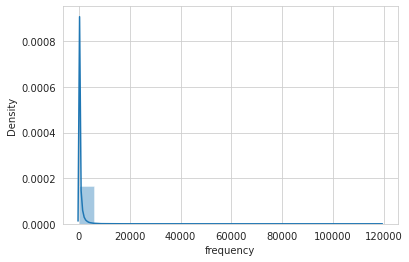

In [ ]:
sns.distplot(df["frequency"], bins=20)

In [ ]:
sns.distplot(customers["Spending Score (1-100)"], bins=20)

### K-means clustering 

frequency


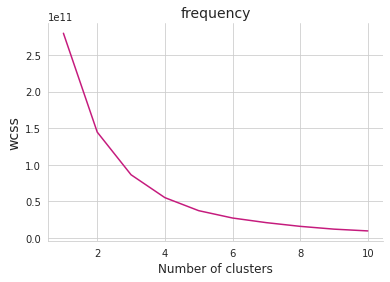

recency


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  if sys.path[0] == '':


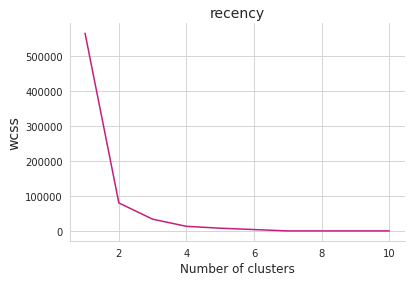

num_install


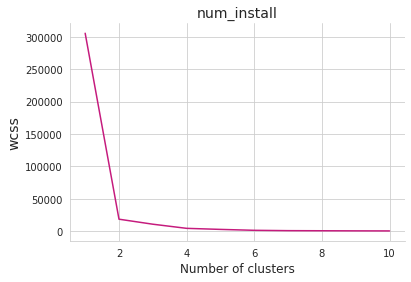

day_from_created_date


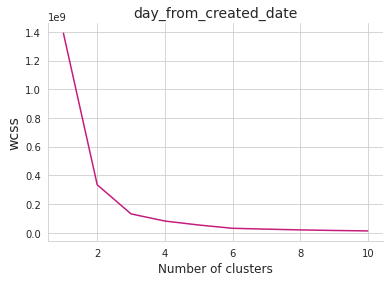

age


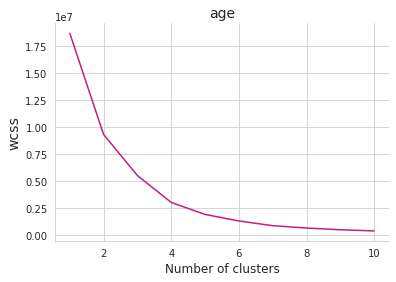

sex


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_cl

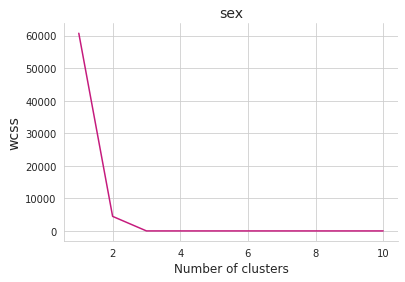

relationship


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  if sys.path[0] == '':


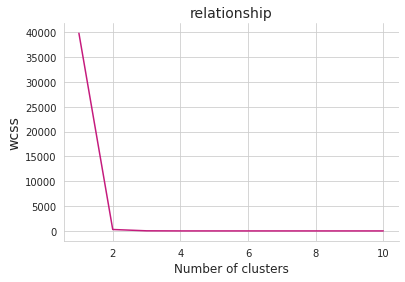

action_cnt_pca


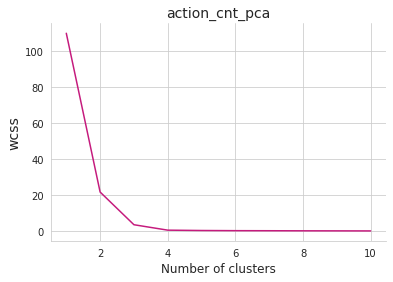

usage_time_cnt_pca


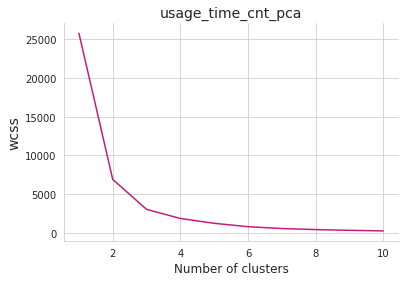

cnt_day_pca


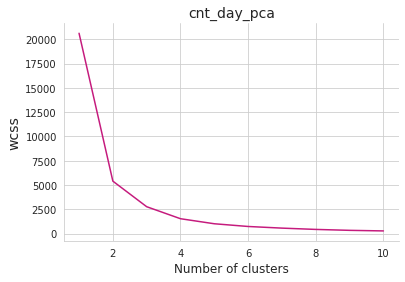

In [ ]:
#Elbow Method

          
for j in list (column):
  print(j)
  wcss = []
  x = final_df[[j]]
  for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
  plt.plot(range(1,11),wcss, c="#c51b7d")
  plt.gca().spines["top"].set_visible(False)
  plt.gca().spines["right"].set_visible(False)
  plt.title(j, size=14)
  plt.xlabel('Number of clusters', size=12)
  plt.ylabel('wcss', size=14)
  plt.show() 

In [ ]:
#clustering
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(final_df[column])

NameError: ignored

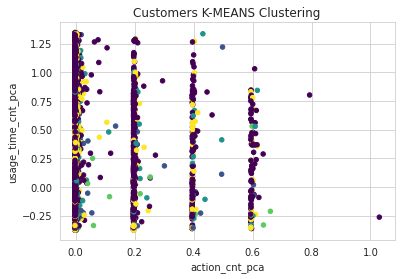

In [ ]:
plt.scatter(final_df["action_cnt_pca"], 
            final_df["usage_time_cnt_pca"], 
            c=y_means, s=20, cmap='viridis')
plt.xlabel("action_cnt_pca")
plt.ylabel("usage_time_cnt_pca")
plt.title("Customers K-MEANS Clustering");

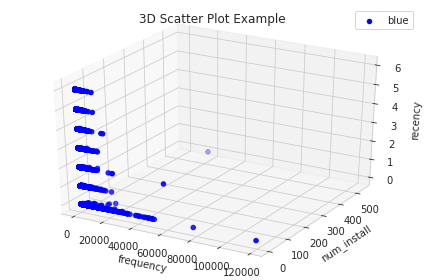

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = final_df['frequency']
y1 = final_df['num_install']
z1 = final_df['recency']

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')
#ax.scatter(x2, y2, z2, c='g', marker='D', label='green')

ax.set_xlabel('frequency')
ax.set_ylabel('num_install')
ax.set_zlabel('recency')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = column)

In [ ]:
centroids.index_name = "ClusterID"

In [ ]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [ ]:
%unload_ext google.colab.data_table


In [ ]:
pd.DataFrame(data = centroids)


,frequency,recency,num_install,day_from_created_date,age,sex,relationship,action_cnt_pca,usage_time_cnt_pca,cnt_day_pca,ClusterID
0,165.121059,1.041177,1.023357,103.358211,24.595677,0.003069,-0.016630,-0.000369,0.013349,0.012827,0
1,14379.668342,0.185930,3.165829,82.927136,26.904523,0.028361,0.229689,0.017395,-0.051867,-0.095293,1
2,5350.896026,0.395671,1.233144,74.206884,26.147268,-0.021907,0.185037,0.005546,-0.104129,-0.109772,2
3,44669.166667,0.066667,1.100000,66.833333,27.833333,0.296343,0.032130,0.102249,-0.112835,-0.145357,3
4,1696.115026,0.677855,1.097289,76.913103,25.631211,-0.026154,0.118503,0.001909,-0.105596,-0.098680,4


In [ ]:
final_df.to_excel("/content/drive/MyDrive/Colab Notebooks/Gapo/output.xlsx")  

## Verify with Hierarchical Clustering

In [ ]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'

linkage_matrix = linkage(pca_2d, linkage_type)

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.set()
# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Hierarchical clustering
from sklearn import preprocessing

#normalized_X = preprocessing.normalize(iris.data)

ward = AgglomerativeClustering(n_clusters=5)
ward_pred = ward.fit_predict(pca_2d)

In [ ]:
plt.scatter(customers["Annual Income (k$)"], 
            customers["Spending Score (1-100)"], 
            c=ward_pred, s=20, cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers Hierarchical Clustering");
